# Load Data

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1):
    fig, ax = plt.subplots(rows, columns)
    ax.plot(x, y_true, '.', c='black', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting', linewidth=4)
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("Exponential (cluster:{0}, cost:{1})".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index13.pickle")
train_idx = train_idx[2] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts50 = np.arange(50)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

print("1:", np.shape(cluster1))
print("2:", np.shape(cluster2))
print("3:", np.shape(cluster3))
print("4:", np.shape(cluster4))
print("5:", np.shape(cluster5))
print("6:", np.shape(cluster6))
print("7:", np.shape(cluster7))
print("8:", np.shape(cluster8))
print("9:", np.shape(cluster9))
print("10:", np.shape(cluster10))
print("11:", np.shape(cluster11))
print("12:", np.shape(cluster12))
print("13:", np.shape(cluster13))

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.
1: (300, 2045)
2: (300, 1709)
3: (300, 1354)
4: (300, 1894)
5: (300, 1930)
6: (300, 2093)
7: (300, 1187)
8: (300, 1988)
9: (300, 1678)
10: (300, 1403)
11: (300, 2489)
12: (300, 1802)
13: (300, 1260)


# 1. Single Curve
## 1-1. Two parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts50, eval("avg{0}".format(i+1))[:50], seed, 
        "../../Figs/curve_fitting/exponential2/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed, 
        "../../Figs/curve_fitting/exponential2/single/dummy", clt_num = i+1)
    
    ## validation
    y_fit_valid = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    y_fit_true = cv.exponential_curve2(attempts300, true_opt[0], true_opt[1])
    
    exp2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp2_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/exponential2/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp2_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/exponential2/single/true{0}".format(i+1), 
          clt_num=i+1, cost = exp2_cost_true)

## 1-2. Three parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential3/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts50, eval("avg{0}".format(i+1))[:50], seed,
        "../../Figs/curve_fitting/exponential3/single/{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/exponential3/single/dummy".format(i+1), clt_num = i+1)

    y_fit_valid = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    y_fit_true = cv.exponential_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    exp3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    cost_valid = cv.cost_Function(attempts300, y_fit_valid)
    cost_true = cv.cost_Function(attempts300, y_fit_true)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid,
              file_path="../../Figs/curve_fitting/exponential3/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_valid)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true,
              file_path="../../Figs/curve_fitting/exponential3/single/true{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_true)

## 1-2. Four parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential4/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3,
        attempts50, eval("avg{0}".format(i+1))[:50], seed,
        "../../Figs/curve_fitting/exponential3/single/sample{0}".format(i+1), clt_num = i+1)

    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/exponential3/single/dummy", clt_num = i+1)

    y_fit_valid = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    y_fit_valid = cv.exponential_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    exp3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    cost_valid = cv.cost_Function(attempts300, y_fit_valid)
    cost_true = cv.cost_Function(attempts300, y_fit_true)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid,
              file_path="../../Figs/curve_fitting/exponential4/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_valid)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true,
              file_path="../../Figs/curve_fitting/exponential4/single/true{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_true)

# 2. Multiple Curves

In [ ]:
for p in range(9): # for 10 pieces
    costs = []
    lengths = np.zeros([1, p+2, 13])
    indice = np.zeros([1, p+2, 13])

    for i in range(3): # for parameters
        print("\n\n - {0} pieces, {1} Parameter".format(p+2, i+2))
        if i == 0: # 2 parameters
            seed = [1, 1]
            leastFunction = cv.exponential_least2
        elif i == 1: # 3 parameters
            seed = [1, 1, 1]
            leastFunction = cv.exponential_least3
        elif i == 2: # 4 parmaeters
            seed = [1, 1, 1, 1]
            leastFunction = cv.exponential_least4

        for j in range(nClt): # for clusters
            print("\t avg{0}, ".format(j+1), end='')
            file_name = "avg{0}".format(j+1)
            cost, min_length, min_indice = cv.multCurve_Fitting(eval(file_name), leastFunction, s=seed, w=30, p=p+2)
            costs.append(cost)
            lengths[:, :, j] = min_length
            indice[:, :, j] = min_indice
            dcp.make_folders('../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/'.format(p+2, i+2, j+1))
            dcp.make_Pickle(cost, '../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/cost.pickle'.format(p+2, i+2, j+1))
            dcp.make_Pickle(min_length, '../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/length.pickle'.format(p+2, i+2, j+1))
            dcp.make_Pickle(min_indice, '../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/index.pickle'.format(p+2, i+2, j+1))

# Multi-curves Plot

1.0
30
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
31.0
270
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
1.0
30
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
31.0
270
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
1.0
30
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
31.0
270
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
1.0
30
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
31.0
270
../../Figs/curve_fitting/MultiCurves/Exponential/pieces2/param2/ already present - Skipping pickling.
1.0
30
piece:0, param:0,

TypeError: object of type 'NoneType' has no len()

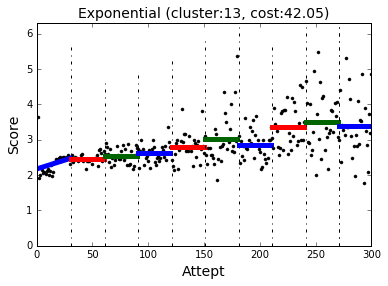

In [10]:
def disp_MultipleCurve():
    x = np.linspace(1, 300, 300)
    curve_color = ['blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue']
    for piece in range(10): # for pieces
        for param in range(3): # for parameters
            for clt in range(nClt): # for clusters

                x_range = "x{0}".format(clt+1)
                y_val = "y{0}".format(clt+1)
                lsq = "lsq{0}".format(clt+1)
                pred = "pred{0}".format(clt+1)
                count = 0 # count for colour
                cost = []
                
                x_idx = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/index.pickle'.format(piece+2, param+2, clt+1))
                
                if param == 0: # 2 parameters
                    seed = [1, 1]
                    func_name = cv.exponential_curve2
                    least_name = cv.exponential_least2
                    parameters = np.zeros([2, len(x_idx)])
                elif param == 1: # 3 parameters
                    seed = [1, 1, 1]
                    func_name = cv.exponential_curve3
                    least_name = cv.exponential_least3
                    parameters = np.zeros([3, len(x_idx)])
                elif param == 2: # 4 parmaeters
                    seed = [1, 1, 1, 1]
                    func_name = cv.exponential_curve4
                    least_name = cv.exponential_least4
                    parameters = np.zeros([4, len(x_idx)])

                plt.clf()
                plt.plot(attempts300, eval('avg{0}'.format(clt+1)), '.', c='black')
                for i in range(len(x_idx)):
                    #print(x_idx[i])

                    if i == 0: # if the first
                        locals()[x_range] = x[:int(x_idx[1])-1]
                        print(eval(x_range)[0])
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[:int(x_idx[1])-1]
                        print(len(eval(y_val)))
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        print("piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])
                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])
                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                        plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                        plt.plot([x_idx[1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                        parameters[:, count] = eval(lsq).x # save parameters
                        count = count+1
                        cost.append(eval(lsq).cost)
                        #print(eval(x_range))

                    elif 0 < i < len(x_idx)-1:
                        locals()[x_range] = x[int(x_idx[i])-1:int(x_idx[i+1])-1]
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[int(x_idx[i])-1:int(x_idx[i+1])-1]
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        print("piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])

                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])

                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                        plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                        plt.plot([x_idx[i+1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                        parameters[:, count] = eval(lsq).x # save parameters
                        count = count+1
                        cost.append(eval(lsq).cost)

                    elif i == len(x_idx)-1: # if the last
                        locals()[x_range] = x[int(x_idx[i])-1:]
                        print(eval(x_range)[0])
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[int(x_idx[i])-1:]
                        print(len(eval(y_val)))
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        #print("LAST!!!!! piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])

                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])

                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                        plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                        plt.plot([x_idx[i]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                        parameters[:, count] = eval(lsq).x # save parameters
                        count = count+1
                        cost.append(eval(lsq).cost)
                            

                    plt.title("Exponential (cluster:{0}, cost:{1})".format(clt+1, round(np.sum(cost), 2)), fontsize=14)
                    plt.ylabel('Score', fontsize=14)
                    plt.xlabel('Attept', fontsize=14)
                    plt.ylim([0, max( eval(y_val) )+1])
                    
                    dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Exponential/pieces{0}/param{1}/".format(piece+2, param+2))
                    plt.savefig("../../Figs/curve_fitting/MultiCurves/Exponential/pieces{0}/param{1}/avg{2}".format(piece+2, param+2, clt+1))
                    dcp.make_Pickle(parameters, '../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/params.pickle'.format(piece+2, param+2, clt+1), force=True)
disp_MultipleCurve()

# By hand for two curves
## Two parameters

## Three parameters

## Four parameters

In [ ]:
import DC_Pickle as dcp
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Exponential/Elbow/")

for clt in range(13): # for clusters (avg)
    print(clt)
    for param in range(3): # for parameters
        Elbow = []
        new_loss = []
        x_piece = np.linspace(1, 9, 9)+1
        for piece in range(9): # for pieces
            loss = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/cost.pickle'.format(piece+2, param+2, clt+1))
            parameters = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Exponential/pieces{0}/param{1}/avg{2}/params.pickle'.format(piece+2, param+2, clt+1))

            Elbow.append(loss)
            #sqr_sum = np.sum(parameters**2)
            
            new_loss.append(loss + 0.05*loss*(piece+1))
            #print(Elbow, new_loss)

        plt.plot(x_piece, Elbow, '.', c='darkgreen')
        plt.plot(x_piece, Elbow, '-', c='g', label="Elbow", linewidth=3)

        #new_loss = Elbow + (piece+1)*np.sum(parameters**2) * (max(loss)/max(parameters)) )
        plt.plot(x_piece, new_loss, '.', c='darkred')
        plt.plot(x_piece, new_loss, '-', c='r', label="Regularisation")

        plt.legend()


        plt.title("Cluster {0} with {1} Parameters".format(clt+1, param+2))
        #plt.ylim([0, max(new_loss)+10])

        plt.savefig("../../Figs/curve_fitting/MultiCurves/Exponential/Elbow/avg{0}_{1}param".format(clt+1, param+2), dpi=100)
        plt.clf()